# Q1(b)

In [1]:
# Required
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, tan, pi, atan, asin, degrees, radians

In [2]:
d_outer = 24
lead = 6
v_linear = 30
f_screw = 0.2
f_collar = 0
power = 3
print(f'Double Acme thread, alpha=14.5')
alpha = 14.5

Double Acme thread, alpha=14.5


i) Perpendicular force applied at lever C

Power is given, we can find the torque using

$$P=\omega T$$
$$P=\frac {2\pi n_{rpm}}{60} T$$

Find $n_{rpm}$ using screw Linear Velocity

$$v_{screw}=Lead\times \frac{n_{rpm}}{60}$$

$$30=6\times \frac{n_{rpm}}{60}$$


In [3]:
n_rpm = v_linear*60/lead
print(f'n_rpm={n_rpm}rpm')

n_rpm=300.0rpm


In [4]:
Torque = round(power*60/(2*pi*n_rpm),2)
print(f'Torque, T = {Torque:.3f}Nm')

Torque, T = 0.100Nm


$$T=F \times d$$
where d is distance of lever C, d=0.15m
$$0.1=F \times 0.15$$

In [5]:
distance = 0.15
Fc = round(Torque/distance,2)
print(f'Perpendicular force at C = {Fc} N')

Perpendicular force at C = 0.67 N


From torque required to tighten the screw.

$$T_u = \frac{Wd_m}{2} \frac{f+\cos\alpha_n \tan\lambda}{\cos\alpha_n + f\tan\lambda} + \frac{Wf_c d_c}{2}$$

In [6]:
print(f'Torque to lift the load, Tu = {Torque:.3f}Nm')

Torque to lift the load, Tu = 0.100Nm


Clamping force developed, W
$$0.100 = \frac{Wd_m}{2} \frac{f+\cos\alpha_n \tan\lambda}{\cos\alpha_n + f\tan\lambda} + \frac{Wf_c d_c}{2}$$

where $f_c=0$ 

Need to find $d_m$ and $\alpha_n$

$$d_m = \frac {D+(D-p)}{2}$$

pitch is unknown, need to find from lead equation.


$$Lead, L=np$$

Lead = 6mm per turn

$$6=2 \times p$$

$$pitch, p = 3mm$$

$$d_m = \frac {24+(24-3)}{2}$$

In [7]:
pitch = lead/2
d_inner = d_outer-pitch
d_mean = (d_outer+d_inner)/2
print(f'Mean diameter, dm= {d_mean} mm')

Mean diameter, dm= 22.5 mm


From equation
$$ \tan\lambda = \frac{L}{\pi d_m} $$

In [8]:
tan_lambda = lead/(pi*d_mean)
print(f'tan(lambda)={tan_lambda}')
lambda_helix = degrees(atan(tan_lambda))
print(f'Lambda = {lambda_helix}')

tan(lambda)=0.08488263631567751
Lambda = 4.851786644764603


From equation
$$\tan\alpha_n=\cos\lambda \tan \alpha$$

In [9]:
alpha_n = degrees(atan(cos(radians(lambda_helix))*tan(radians(alpha))))
print(f'alpha_n = {alpha_n}')

alpha_n = 14.45022286204183


$$0.100 = \frac{W(0.0225)}{2} \frac{0.2+\cos(14.45) \tan\lambda}{\cos(14.45) + 0.2 \tan\lambda} + 0$$

In [33]:
F_d = 2*(cos(radians(alpha_n))-(f_screw*tan(radians(lambda_helix))))*Torque/(d_mean*(f_screw+(cos(radians(alpha_n))*tan(radians(lambda_helix)))))
print(f'W={F_d:.3f}N')

W=0.030N


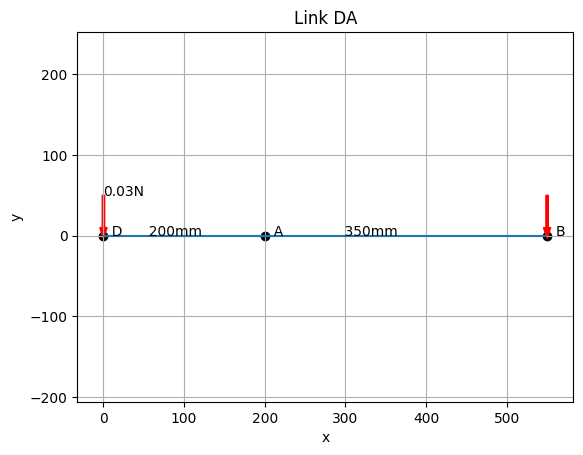

In [31]:
# FBD for Link DA
coorA = [200,0]
coorD = [0,0]
coorB = [550,0]

data = np.array([coorA,coorB,coorD])
x, y = data.T
fig, ax = plt.subplots()
ax.grid()
ax.scatter(x,y, color='k')
ax.arrow(coorD[0],coorD[1]+50, 0,-40,width=3,color='r')
ax.arrow(coorB[0],coorB[1]+50, 0,-40,width=3,color='r')
ax.hlines(0,0,550)

ax.set(xlabel='x', ylabel='y',
       title='Link DA')

ax.text(coorD[0],coorD[1]+50,f'0.03N')
ax.text(coorD[0],coorD[1],f'  D      200mm')
ax.text(coorA[0],coorA[1],f'  A              350mm')
ax.text(coorB[0]+10,coorB[1],f'B')

plt.axis('equal')
plt.show()

$$+\circlearrowleft \sum M_A=0$$
$$0.03(0.2)-F_b(0.35)=0$$
$$W=0.03(0.2)/0.35$$

In [35]:
F_b = round(0.03*0.2/0.35,3)
print(f'Clamping force, Fb={F_b} N')

Clamping force, Fb=0.017 N


ii) If double square square thread is used

No collar friction and square thread is used. W is same.

$f_c = 0$ and $\alpha=0 , \alpha_n=0$

$$T'_u = \frac{Wd_m}{2} \frac{f+\cos(0) \tan\lambda}{\cos(0) + f\tan\lambda}$$
$$T'_u = \frac{(0.03)(0.0225)}{2} \left( \frac{0.2+\cos(0) \tan\lambda}{\cos(0) + 0.2\tan\lambda} \right)$$

In [45]:
T_u_new =(F_d*(d_mean/1000)/2)*((f_screw+(cos(0)*tan(radians(lambda_helix))))/(cos(0)-(f_screw*tan(radians(lambda_helix)))))
print(f'New torque, Tu={T_u_new:.6f} Nm')
print('Torque is decreased when double square thread is used')

New torque, Tu=0.000098 Nm
Torque is decreased when double square thread is used


iii) Length of level C when clamping force increase to 30%

In [47]:
print(f'Clamping force, Fb={F_b} N')
F_b_new = 1.3*F_b
print(f'New Clamping force, Fb_new={F_b_new} N')


Clamping force, Fb=0.017 N
New Clamping force, Fb_new=0.0221 N


$$+\circlearrowleft \sum M_A=0$$
$$W_{new}(0.2)-(0.0221)(0.35)=0$$
$$W_{new}=(0.0221)(0.35)/0.2$$

In [51]:
W_new = round(F_b_new*0.35/0.2,4)
print(f'New W = {W_new} N')

New W = 0.0387 N


Insert into torque to lift the load equation with the new W.

$$T_{new} = \frac{(0.0387)(0.0225)}{2} \frac{0.2+\cos(14.45) \tan\lambda}{\cos(14.45) + 0.2 \tan\lambda} + 0$$

In [55]:
T_new =(W_new*(d_mean/1000)/2)*((f_screw+(cos(radians(alpha_n))*tan(radians(lambda_helix))))/(cos(radians(alpha_n))-(f_screw*tan(radians(lambda_helix)))))
print(f'New Tu = {T_new} Nm')

New Tu = 0.00012913936190952786 Nm


$$T_{new}=F_{new} \times d$$
where d is distance of lever C, d=0.15m
$$0.0001291=F_{new} \times 0.15$$

In [58]:
F_new = T_new/0.15
print(f'New Force at C, FC = {F_new} N')

New Force at C, FC = 0.0008609290793968525 N
